<a href="https://colab.research.google.com/github/jhildebrand22/HW-PS353/blob/main/12_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install whit_phys_util 1> /dev/null

In [3]:
import whit_phys_util as buc
import numpy as np
import matplotlib.pyplot as plt

Mounted at /content/drive


##Sine map
> $$
x_{t + 1} = r \sin(\pi x_t)
$$

In [6]:
def f(r,x):
  return r*np.sin(np.pi*x)

In [35]:
r1 = 0.15
r2 = 0.85
x = np.linspace(0.0001,0.9999,501)

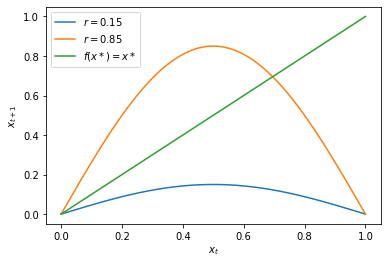

In [22]:
fig,ax = plt.subplots()
ax.plot(x,f(r1,x),label='$r = 0.15$')
ax.plot(x,f(r2,x),label='$r = 0.85$')
ax.plot(x,x,label='$f(x*) = x*$')
ax.set_xlabel('$x_t$')
ax.set_ylabel('$x_{t+1}$')
ax.legend();

a) \
We can identify fixed points based on the what the function $f(x*)$ returns. If $f(x*) = x*$, we know we have a fixed point, therefore intersections with that line on the above graph indicates fixed points of our sine map. As the graph shows, for small r, there is one intersections at $x = 0$, indicatinf that for small r there is only one fixed point, $x* = 0$. When r gets bigger, another intersection occurs as shown by the $r = 0.85$ line on the above graph, which has r dependence, it will increase with r. So, for large r (relative t our range of 0 to 1), there are two fixed points. 
\
\
As far as stability goes, we can show stability based on the value of $f(x)$. Since This is a map, $f(x)$ represents the next discrete point. As the lower line shows, the value of $f(x)$ is lower than the crresponding value of $x$, meaning that every iteration the value of $x$ is decreasing, making $x^* = 0$ an attractor, or a stable fixed point.  

b) 
\
If $|f'(x)| < 1$, $x^*$ is an attractor. If $|f'(x)| > 1$, $x^*$ is an repeller. 
\
\
$$
f'(x^*) = r \pi \cos(\pi x^*)
$$\
If we plug 0 in for $x^*$, we find that $f'(0) = r\pi$. On the threshold, $r\pi = 1$, therefore we know that when $r < \frac{1}{\pi}$, $x^* = 0$ is an attractor. This also tells us that when $r > \frac{1}{\pi}$, $x^* = 0$ is a repeller, which means that our $r_0$ value is the threshold at which $x^* = 0$ switches from stable to unstable. 
 
Therefore, 
$$ r_0 = \frac{1}{\pi} $$ 